# 1. Introduction

## 1.1 Background

## 1.2 Problem Statement

# 2. Imports

## 2.1 Libraries

Libraries imported here are for loading data, EDA purposes and self-defined functions from blahblahblah.py

In [ ]:
#Importing libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import os

from collections import Counter
from PIL import Image
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

## 2.2 Train and Test Data

- Images are sourced from an image database dedicated for computer vision projects, [Roboflow](https://universe.roboflow.com/) on pictures of healthy and diseased bok choy.
- Loading image data using ImageDataGenerator from keras for viewing and EDA where: 
    - Classification labels are assigned through file organisation. 
    - Each image is resized to 224 by 224 pixels due to:
        - "Information" of the image are still decently represented 
        - Improve training time and considering limited computational resources

In [14]:
#Loading the ata of bak choy images
train_data_view = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory('data img of bak choy/Train', 
                                                                                             target_size=(224,224), 
                                                                                             class_mode='binary')

val_data_view= ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory('data img of bak choy/Validation', 
                                                                                           target_size=(224,224), 
                                                                                           class_mode='binary')

Found 468 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [15]:
#Ensuring the classes are correctly and consistently identified across train and validation data
print(f'Classes in train data: {train_data_view.class_indices}') 
print(f'Classes in validation data: {val_data_view.class_indices}') 

Classes in train data: {'disease': 0, 'healthy': 1}
Classes in validation data: {'disease': 0, 'healthy': 1}


### 2.2.1 Balance of image classes

- The amount of images in the train dataset are balance between the 2 classes with:
    - 230 healthy bok choy images
    - 238 diseased bok choy images
- 50 validation images for both healthy and diseased images

In [16]:
#Creating a function to count the number of images of classification 
def count_class(data):
    count_healthy = 0
    count_unhealthy = 0
    for i in range(len(data)):
        labels = data[i][1]
        count_healthy += labels.tolist().count(1)
        count_unhealthy  += labels.tolist().count(0)
    print(f'Number of healthy bok choy images: {count_healthy}')
    print(f'Number of diseased bok choy images: {count_unhealthy}')

In [17]:
count_class(train_data_view)

Number of healthy bok choy images: 230
Number of diseased bok choy images: 238


In [18]:
count_class(val_data_view)

Number of healthy bok choy images: 50
Number of diseased bok choy images: 50


## 2.3 Images of vegetable with water droplets

- There might be instances during irrigation of the vegetables where water droplets are present on the leaves which might interfere with the accuracy of the image classification. Such cases might be rare since the images are taken under the context of hydroponic farms.
- Nonetheless, for the model evaluation, manual conduct of accuracy test on classification of images will be carry out on such images to understand the model's capability under such circumstances.
- Due to the limited amount of quality images available that suits the context, the test is conducted using 15 hand-picked selected images, under no presence of downy mildew, with the use of [Data Augmentation](https://medium.com/lansaar/what-is-data-augmentation-3da1373e3fa1) to create more images for evaluation.

# 3. Data Augmentation

Data Augementation is conducted on the images of vegetables with water droplets to create more images.

In [38]:
#Set the paths for input and output folders
input_folder = 'water droplet images'
output_folder = 'augmented_images'

#Creating the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

#Initialize the ImageDataGenerator with desired augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,  #Rotate images randomly within the range of 20 degrees
    width_shift_range=0.1,  #Shift images horizontally randomly by a fraction of total width
    height_shift_range=0.1,  #Shift images vertically randomly by a fraction of total height
    shear_range=0.2,  #Apply shear transformation randomly within the range of 0.2
    zoom_range=0.2,  #Zoom in/out on images randomly within the range of 0.2
    horizontal_flip=True,  #Flip images horizontally randomly
    vertical_flip=True  #Flip images vertically randomly
)

#Get the list of image filenames in the input folder
image_filenames = os.listdir(input_folder)

#Loop over each image file and generate augmented images
for filename in image_filenames:
    #Load the input image
    input_image_path = os.path.join(input_folder, filename)
    input_image = cv2.imread(input_image_path)

    #Reshape the input image to a 4D tensor with shape (1, height, width, channels)
    input_image = input_image.reshape((1,) + input_image.shape)

    #Generate augmented images using the datagen.flow() method
    augmented_images = datagen.flow(input_image, batch_size=1, save_to_dir=output_folder, save_prefix='augmented', save_format='jpeg')

    #Generate and save multiple augmented images
    num_augmented_images = 2  
    for i, image in enumerate(augmented_images):
        if i >= num_augmented_images:
            break

    print(f"Augmented images saved for {filename}")

Augmented images saved for water 01.jpg
Augmented images saved for water 02.jpg
Augmented images saved for water 03.jpg
Augmented images saved for water 04.jpg
Augmented images saved for water 05.jpg
Augmented images saved for water 06.jpg
Augmented images saved for water 07.jpg
Augmented images saved for water 08.jpg
Augmented images saved for water 09.jpg
Augmented images saved for water 10.jpg
Augmented images saved for water 11.jpg
Augmented images saved for water 12.jpg
Augmented images saved for water 13.jpg
Augmented images saved for water 14.jpg
Augmented images saved for water 15.jpg


# 4. EDA and preprocessing

## 4.1 Display of data images

- Display of random 3 images in each class in the RGB color space. 
- The images viewed here are dimmer than how they actually are but it does not affect the actual picture quality 

In [20]:
#Function to display number of images from image dataset based on its category 
def display_img(data,category,number):
    class_index = data.class_indices[category]
    displayed_images = 0

    for images, labels in data:
        #Filtering images based on the class
        healthy_images = images[labels == class_index]
        #Displaying the filtered images
        for image in healthy_images:
            plt.imshow(image)
            plt.show()

            displayed_images += 1

            if displayed_images >= number:
                break
            
        if displayed_images >= number:
            break

#### Healthy vegetable images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


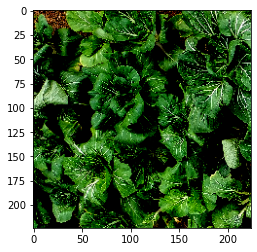

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


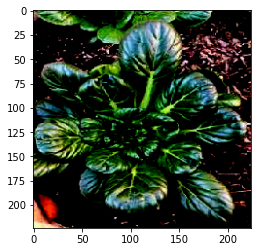

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


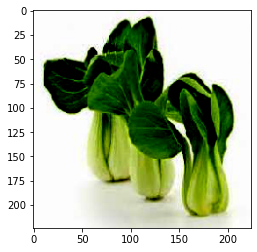

In [21]:
#Sample view of images in each class
display_img(train_data_view, 'healthy', 3)

#### Diseased vegetable images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


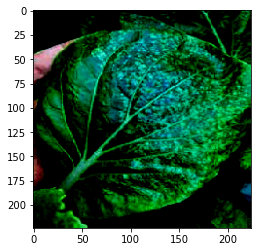

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


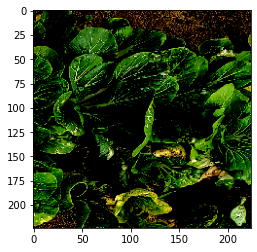

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


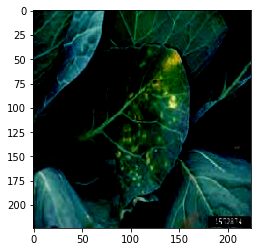

In [22]:
#Sample view of images in each class
display_img(train_data_view, 'disease', 3)

## 4.2 Most common colors

- To view the most common color pixel of each image for each class in the Train dataset to have an understanding on the overall range and intensity of the colors present in the images.
- Some images have majority of darker pixels thus a threshold is set to ignore those images.


In [23]:
def common_colors_grid(image_folder): 
    
    #Creating a list of image file names in the folder
    image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.jpg'))]

    most_common_colors = []
    
    #Setting darkness threshold to 
    darkness_threshold = 150
    
    # Counting the amount of pixels for different colors
    for image_file in image_files:
        image = Image.open(image_file)
        pixel_values = np.array(image)
        pixels = pixel_values.reshape(-1, 3)
        color_counter = Counter(map(tuple, pixels.tolist()))
        
        #Storing the most common color based on highest count value of a color pixel
        most_common_color = color_counter.most_common(1)[0][0]
        most_common_colors.append(most_common_color)
        if sum(most_common_color) < darkness_threshold:
            most_common_color = color_counter.most_common(2)[1][0]
        most_common_colors.append(most_common_color)

    most_common_colors = np.array(most_common_colors, dtype=np.uint8)
    
    #Sorting the array of stored most common color pixels based on largest RGB numeric values to smallest
    most_common_colors = sorted(most_common_colors, key=lambda c: sum(c), reverse=True)
    
    #Determing the size of the plot space 
    num_pixels = len(most_common_colors)
    expected_pixels = 15 * 30

    #Pad or trim the most_common_colors array to match the expected number of pixels for neat plot of the pixels
    if num_pixels < expected_pixels:
        num_padding = expected_pixels - num_pixels
        most_common_colors += [(0, 0, 0)] * num_padding
    elif num_pixels > expected_pixels:
        most_common_colors = most_common_colors[:expected_pixels]

    image_array = np.array(most_common_colors, dtype=np.uint8).reshape(15, 30, 3)

    #Creating an image from the most common colors
    result_image = Image.fromarray(image_array)
    
    plt.figure(figsize=(10, 10))
    
    #Display the resulting image
    plt.imshow(result_image)
    plt.show()

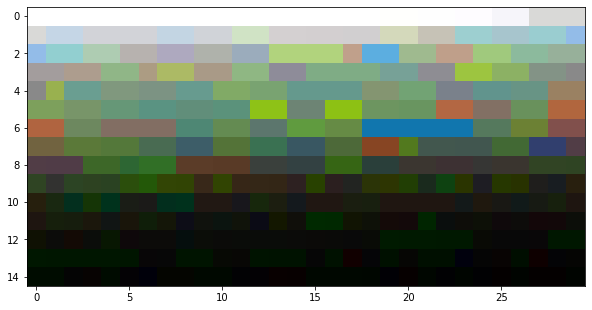

In [24]:
common_colors_grid('data img of bak choy/Train/disease')

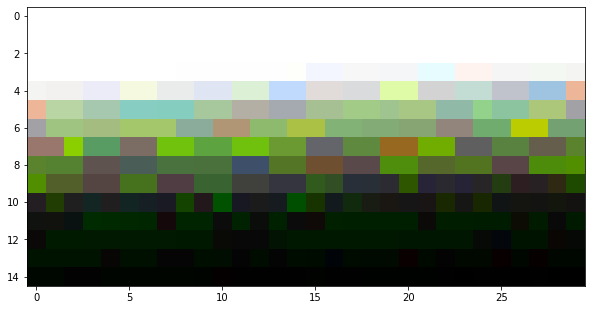

In [25]:
common_colors_grid('data img of bak choy/Train/healthy')

Observation:
- Overall the most common colors are of green, yellow and brown hues as expected.
- Overall brighter colors in the 'healthy' class seems to be stronger than the images in the 'disease' class.
    - This could be due to the healthy bok choy are presented in 2 main colors of white and green whereas the images of diseased bok choy are present with yellow and brown hues which are of "darker" colors.
- More white spaces in the images in the 'healthy' class as some of these specific images used are taken under white background.

## 4.3 Preprocessing

### 4.3.1 Histogram Equalization

- Considering that the images are taken throughout the day where there will be different degree of illumination of the colors, the contrast will thus vary. Therefore, images with insufficient contrast would have narrower range of spectrum of colors and thus carry less information for model training.
- A preprocessing method to resolve this is through [Histogram Equalization](https://staff.fnwi.uva.nl/r.vandenboomgaard/ComputerVision/LectureNotes/IP/PointOperators/HistogramEqualization.html). To enhance the image’s contrast, it spreads out the most frequent pixel intensity values or stretches out the intensity range of the image. By accomplishing this, histogram equalization allows the image’s areas with lower contrast to gain a higher contrast. 
- The process will be done in the RGB color space since biological interpretation of colors is not of concerned.
 

##### Check on contrast

Taking a sample image to check on its contrast.

In [26]:
#Loading an image as an example
sample_image = cv2.imread('data img of bak choy/Train/disease/3_jpg.rf.c7d15212a63f7413a99dad3329a6321f.jpg')

In [27]:
def contrast_show(image):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #Plotting the original image
    axes[0].imshow(image)
    axes[0].set_title('Image')

    #Plotting of the histogram that display the spread of colors
    axes[1].hist(image.ravel(), bins=256, color='grey')
    axes[1].hist(image[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
    axes[1].hist(image[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
    axes[1].hist(image[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
    axes[1].set_title('Image Histogram')
    axes[1].legend(['Total (RGB)', 'Red', 'Green', 'Blue'])
    axes[1].set_xlabel('RGB Values')
    axes[1].set_ylabel('Frequency of Pixels')


    #Adjusting subplot spacing
    plt.tight_layout();

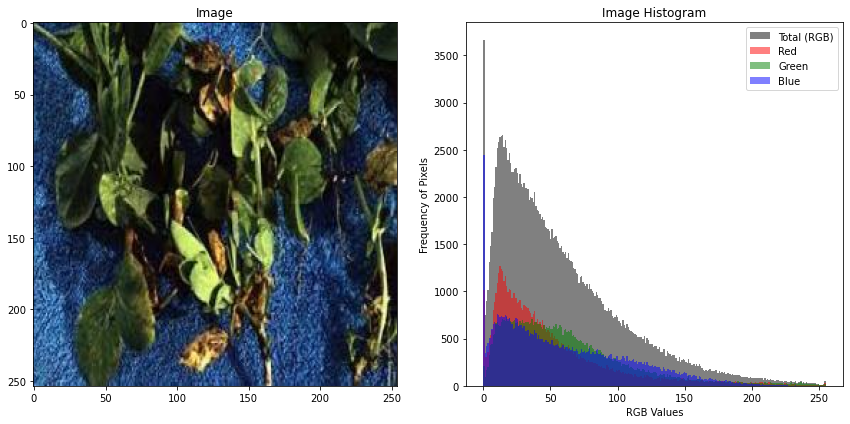

In [28]:
contrast_show(sample_image)

Spread of Red, Green and Blue are right skewed where there are less high values on the RGB colors suggesting that such pictures have low contrast. The image will undergo Histogram Equalisation to balance the contrast to make the colors on the image to be more defined.

##### Implementing histogram equalization in RGB color space

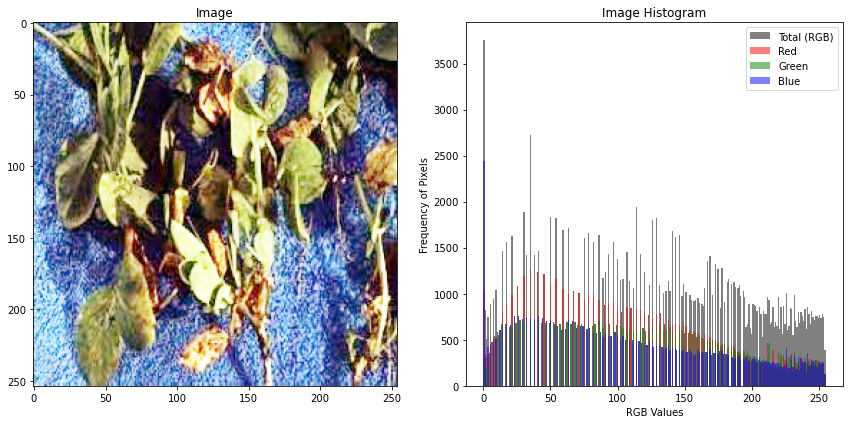

In [29]:
#Converting image from BGR to RGB color space
rgb_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

#Split the RGB image into individual channels
r_channel, g_channel, b_channel = cv2.split(rgb_image)

#Apply histogram equalization to each channel
equalized_r_channel = cv2.equalizeHist(r_channel)
equalized_g_channel = cv2.equalizeHist(g_channel)
equalized_b_channel = cv2.equalizeHist(b_channel)

#Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((equalized_r_channel, equalized_g_channel, equalized_b_channel))

#Converting the RGB image back to BGR for the function, contrast_show()
equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_RGB2BGR)
#
contrast_show(equalized_image)

Comparing to the image and the histogram plot before Histogram equalization, the colors of the image is more distributed across the RGB values as it increases the frequency of pixels in the higher range of RGB values (i.e colors with higher amount of light). Visually, it also appears "brighter" where we can better visually distinguish the features of the image.

### 4.3.2 Saturation

##### Amplifying saturation for yellow hues
Visual symptoms of downy mildew involves yellow blemishes on the underside of the leaves. In attempt to assist the model in detection for such signals in the image, the saturation of yellow hues are amplified. Below illustrates the changes to the sample image.

In [30]:
def increase_yellow_saturation(image):
    #Converting the image from BGR to HSV color space
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    #Define the lower and upper thresholds for yellow color in HSV
    lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
    upper_yellow = np.array([40, 255, 255], dtype=np.uint8)

    #Creating a mask for yellow pixels
    yellow_mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

    #Split the HSV image into individual channels
    h, s, v = cv2.split(image_hsv)

    #Increase the saturation of yellow pixels
    s_yellow = s[yellow_mask > 0]
    s_yellow = np.clip(s_yellow + 255, 0, 255)
    s[yellow_mask > 0] = s_yellow

    #Merging the modified channels back into the HSV image
    image_hsv = cv2.merge((h, s, v))

    # onvert the modified HSV image to RGB
    modified_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
    #return image_hsv
    return modified_image

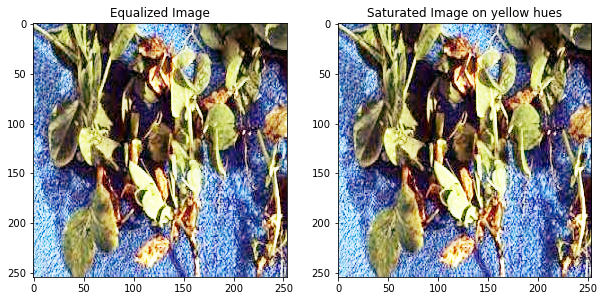

In [31]:
#Display of images undergoing higher degree of saturation on yellow hues

#Processing the image to raise saturation levels
saturated_image = increase_yellow_saturation(equalized_image)

#Plotting the images

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Conversion of equalised_image to RGB for plotting purpose
equalized_image_RGB = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)

axes[0].imshow(equalized_image_RGB)
axes[0].set_title('Equalized Image')

axes[1].imshow(saturated_image)
axes[1].set_title('Saturated Image on yellow hues')

plt.show()

The increase in saturation on yellow hues might not be detected by the naked eye but through a quick check on the saturation levels across all pixels, the saturated image have higher saturation levels.

In [32]:
#Function on calculating average saturation levels of an image
def calculate_average_saturation(image):
    # Convert the image from BGR to HSV color space
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Extract the saturation channel (S)
    saturation = image_hsv[:, :, 1]
    
    # Calculate the average saturation value
    average_saturation = np.mean(saturation)
    
    return average_saturation

In [33]:
print(f'Average saturation level of equalised image :{calculate_average_saturation(equalized_image).round(2)}')
print(f'Average saturation level of saturated image :{calculate_average_saturation(saturated_image).round(2)}')

Average saturation level of equalised image :120.93
Average saturation level of saturated image :121.72


### 4.3.3 Function to conduct Histogram Equalisation & Saturation adjustment

Both the histogram equalisation and saturation adjustment will be apply to the images which the model will be training based on these processed images.

In [34]:
def hist_equalization_all(image):
    #Converting image from BGR to RGB color space
    RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #Split the RGB image into individual channels
    r_channel, g_channel, b_channel = cv2.split(RGB_image)

    #Apply histogram equalization to each channel
    equalized_r_channel = cv2.equalizeHist(r_channel)
    equalized_g_channel = cv2.equalizeHist(g_channel)
    equalized_b_channel = cv2.equalizeHist(b_channel)

    #Merge the equalized channels back into an RGB image
    equalized_image = cv2.merge((equalized_r_channel, equalized_g_channel, equalized_b_channel))

    #Converting the RGB image back to BGR for the function, contrast_show()
    equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_RGB2BGR)
    
    return equalized_image

In [35]:
def increase_yellow_saturation_all(image):
    #Converting the image from BGR to HSV color space
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    #Define the lower and upper thresholds for yellow color in HSV
    lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
    upper_yellow = np.array([40, 255, 255], dtype=np.uint8)

    #Creating a mask for yellow pixels
    yellow_mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

    #Split the HSV image into individual channels
    h, s, v = cv2.split(image_hsv)

    #Increase the saturation of yellow pixels
    s_yellow = s[yellow_mask > 0]
    s_yellow = np.clip(s_yellow + 255, 0, 255)
    s[yellow_mask > 0] = s_yellow

    #Merging the modified channels back into the HSV image
    image_hsv = cv2.merge((h, s, v))

    #Convert the modified HSV image to BGR
    modified_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
   
    return modified_image

In [36]:
def preprocess_image(input_folder, output_folder):
    
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg')):
            # Load the input image
            input_image_path = os.path.join(input_folder, filename)
            input_image = cv2.imread(input_image_path)
            equalized_img = hist_equalization_all(input_image)
            processed_img = increase_yellow_saturation_all(equalized_img)

            # Save the output image to the output folder
            output_image_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_image_path, processed_img)

In [42]:
#Run of the preprocess functions on train and validation image data
preprocess_image('data img of bak choy/Train/disease', 'processed_img/Train/disease')
preprocess_image('data img of bak choy/Train/healthy', 'processed_img/Train/healthy')
preprocess_image('data img of bak choy/Validation/disease', 'processed_img/Validation/disease')
preprocess_image('data img of bak choy/Validation/healthy', 'processed_img/Validation/healthy')

These preprocessed images will be utilised for modeling in the notebook, 02_Modeling.